***Question 1***

*a) Strategy:
    Using lasso linear regression model. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, 
    effectively reducing the number of features upon which the given solution is dependent.*

In [1]:
import numpy as np
data = np.loadtxt('mystery.dat', delimiter=',')

Creating Lasso model with alpha = 0.5

In [2]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.5)


Creating feature data and label data separately.

In [3]:
feature_date = data[:,:-1] #all but last column
label_Data = data[:,-1] #last column

Fit the model with coordinate descent

In [4]:
clf.fit(feature_date, label_Data)
coeff = clf.coef_

Taking features in form of indexes

In [5]:
selected_feature_idx = np.where(coeff > 0)

*(b) Which ten features did you identify? You need only give their coordinate numbers, from 1 to 100.*

In [6]:
print("selected feature coordinates: ",selected_feature_idx)

selected feature coordinates:  (array([ 1,  2,  4,  6, 10, 12, 16, 18, 22, 26]),)


***Question 2***

In [7]:
import pandas as pd
import numpy as np

seed = 20

df = pd.read_csv('heart.csv')

from sklearn import preprocessing

x_df = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_df)
df = pd.DataFrame(x_scaled, columns=df.columns)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]



*(a) Randomly partition the data into 200 training points and 103 test points. Fit a logistic regression
model to the training data and display the coefficients of the model. If you had to choose the
three features that were most influential in the model, what would they be?*

Randomly partition the data into 200 training points and 103 test points. 

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 200, test_size = 103, random_state=seed)

print("Data Check ...")
df

Data Check ...


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


In [9]:
print("X_train.shape",X_train.shape)
print("X_test.shape",X_test.shape)
print("y_train.shape",y_train.shape)
print("y_test.shape",y_test.shape)

X_train.shape (200, 13)
X_test.shape (103, 13)
y_train.shape (200,)
y_test.shape (103,)


Logistic regression model to the training data

In [10]:
#Fitting logistic regression model on the data
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=3000).fit(X_train, y_train)

Coefficients of the model

In [11]:
#coefficients of model
print("Coefficients of model : ",log_reg_model.coef_)

Coefficients of model :  [[-0.36487483 -1.04808833  1.57804869 -1.49643241 -0.21347466  0.17541418
   0.73158831  1.24912955 -1.49609234 -1.28264507  0.66035653 -1.84989947
  -1.22355096]]


Top 3 features

In [12]:
#printing the top 3 coefficient with absolute values to pick the top 3 features
res = np.absolute(log_reg_model.coef_[0,:])
indices = (-res).argsort()[:3]
print("Top 3 Features : ", np.asarray(df.columns[indices]))

Top 3 Features :  ['ca' 'cp' 'trestbps']


*(b) What is the test error of your model?*

In [13]:
predictions = log_reg_model.predict(X_test)
err_predictions = np.not_equal(predictions,y_test)
error = float(np.sum(err_predictions))/len(y_test)
print("Error Rate:" ,error)

Error Rate: 0.23300970873786409


*(c) Estimate the error by using 5-fold cross-validation on the training set. How does this compare to
the test error?*

In [14]:
#This method gives you cross validation error for k folds
def getCrossValidationError(X_train,splits):
    kf = KFold(n_splits=splits,shuffle=True, random_state=seed)
    kf.get_n_splits(X_train)


    #This is to store all the errors to average out later
    error_arr = []
    fold = 0

    #Using training data for cross validation
    for train_index, test_index in kf.split(X_train):
        fold = fold + 1
        X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
        log_reg_model = LogisticRegression(max_iter=3000)
        log_reg_model.fit(X_train_cv, y_train_cv)
        predictions = log_reg_model.predict(X_test_cv)
        err_predictions = np.not_equal(predictions,y_test_cv)
        error = float(np.sum(err_predictions))/len(y_test_cv)
        error_arr.append(error)
    cv_err = sum(error_arr) / len(error_arr)         
    return round(cv_err,3);


In [15]:
import numpy as np
from sklearn.model_selection import KFold

print("Cross validation error rate",getCrossValidationError(X_train,5))
    

Cross validation error rate 0.165


The cross validation error rate on training data is lower than the test error rate.

***Question 3***

*(a) Use this procedure to find a k-sparse logistic regression solution for the heart disease data, for
k = 1, 2, . . . , 13. Create a single plot showing the test error and cross-validation error for all these
values of k.*

In [16]:
available_features = df.columns.to_numpy()
available_features = available_features[available_features != 'target']

S = list()
cv_error_lst = []
test_error_lst = []
k_values = []
k=1
while(len(available_features) != 0):
    #This is to plot a graph later
    k_values.append(k)
    #print(available_features)
    feature_error = {}
    for f in available_features:
        feature_set = S.copy()
        feature_set.append(f)
        #print("Trying out {0} features".format(feature_set))
        X_train_f = X_train[feature_set]
        
        cv_error = getCrossValidationError(X_train_f,5)

        
        #print(f,error)
        feature_error[f] = cv_error
    #print(feature_error)    
    select_feature = min(feature_error, key=feature_error.get)
    S.append(select_feature)    
    print("Chosen features: {0} for k = {1}".format(S,k))
    cv_error_lst.append(cv_error)
    
    #storing the features for k = 2 for plotting decision boundary
    if(k == 2):
        k_2_features = np.copy(S)
        
    #keeping y train same as it target variable is not changing
    log_reg_model = LogisticRegression(max_iter=3000)
    log_reg_model.fit(X_train[S], y_train)
    predictions = log_reg_model.predict(X_test[S])

    #keeping y test since target variable is not changing
    err_predictions = np.not_equal(predictions,y_test)
    test_error = round(float(np.sum(err_predictions))/len(y_test),3)
    #print("Test error :",test_error)
    test_error_lst.append(test_error)
    
    print("Cross Validation error: {1} and Test error: {2}".format(S,feature_error[select_feature],test_error))
    print('='*150)
    
    #print("Min error feature: ", select_feature)
    available_features = available_features[available_features != select_feature]
    #print("available_features:",available_features)
    
    
    k = k+1


Chosen features: ['cp'] for k = 1
Cross Validation error: 0.24 and Test error: 0.243
Chosen features: ['cp', 'trestbps'] for k = 2
Cross Validation error: 0.24 and Test error: 0.243
Chosen features: ['cp', 'trestbps', 'exang'] for k = 3
Cross Validation error: 0.215 and Test error: 0.301
Chosen features: ['cp', 'trestbps', 'exang', 'thal'] for k = 4
Cross Validation error: 0.19 and Test error: 0.272
Chosen features: ['cp', 'trestbps', 'exang', 'thal', 'restecg'] for k = 5
Cross Validation error: 0.185 and Test error: 0.282
Chosen features: ['cp', 'trestbps', 'exang', 'thal', 'restecg', 'oldpeak'] for k = 6
Cross Validation error: 0.175 and Test error: 0.262
Chosen features: ['cp', 'trestbps', 'exang', 'thal', 'restecg', 'oldpeak', 'sex'] for k = 7
Cross Validation error: 0.175 and Test error: 0.272
Chosen features: ['cp', 'trestbps', 'exang', 'thal', 'restecg', 'oldpeak', 'sex', 'slope'] for k = 8
Cross Validation error: 0.16 and Test error: 0.233
Chosen features: ['cp', 'trestbps', 'e

Plot showing the test error and cross-validation error for all these
values of k.

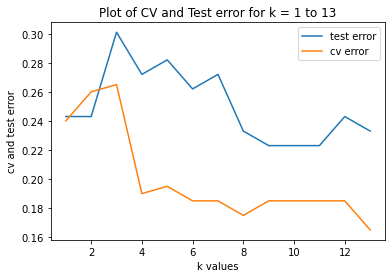

In [17]:
#Plotting the CV and Test error
import matplotlib.pyplot as plt
# line 1 points

# plotting the line 1 points 
plt.plot(k_values, test_error_lst, label = "test error")

# plotting the line 2 points 
plt.plot(k_values, cv_error_lst, label = "cv error")
plt.xlabel('k values')
# Set the y axis label of the current axis.
plt.ylabel('cv and test error')
# Set a title of the current axes.
plt.title('Plot of CV and Test error for k = 1 to 13')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

*(b) What two features were chosen for k = 2? Plot the decision boundary in this case.*

For k = 2 ,Lets do logistic regerssion again with these two features


For k = 2, we got features:  ['cp' 'trestbps']
coefficients:  [2.44142992] [-1.87537002]


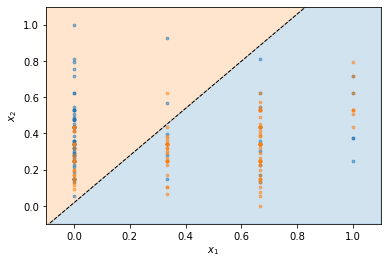

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

#Referred https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/

#for k = 2 , lets see what features we got
print("For k = 2, we got features: ", k_2_features)
#X = X_train[['cp','ca']].to_numpy()
X = X_train[k_2_features].to_numpy()
Y = y_train.to_numpy()

# Fit the data to a logistic regression model.
clf = LogisticRegression(max_iter=1000)
clf.fit(X, Y)

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
print("coefficients: ",w1, w2)
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.

#This is to keep the scale of the graph to show all points getting min and max 
# and doing 1 unit addition or subtraction for covering all points.
xmin,ymin = np.amin(X,axis=0) - 0.1
xmax,ymax = np.amax(X,axis=0) + 0.1

#xmin, xmax = -1,1.5
#ymin, ymax = 90, 210
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')


plt.scatter(*X[Y==0].T, s=8, alpha=0.5)
plt.scatter(*X[Y==1].T, s=8, alpha=0.5)
plt.show()